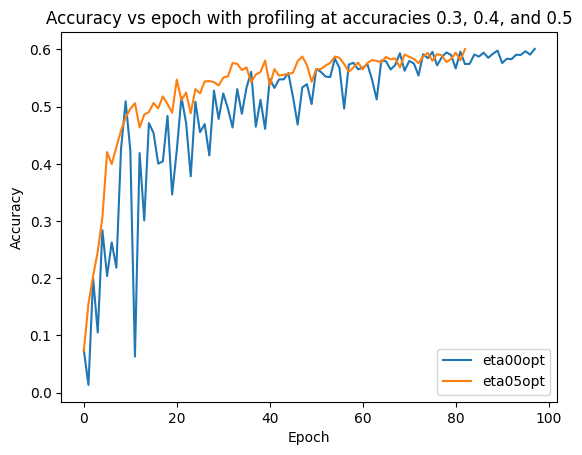

In [110]:
# 'The optimal parameters are' --> finish profiling
# start of profiling: 'surpasses threshold'

import matplotlib.pyplot as plt
# get accuracy
valNext = False
ACC = "Accuracy: "

# files = ["eta00/master.txt", "eta05/master.txt", "eta10/master.txt"]
files = ["eta00opt/master.txt", "eta05opt/master.txt"]

for fileName in files:
    accuracies = []
    with open(fileName) as f:
        while line := f.readline():
            if valNext:
                if "Validation Epoch:" in line:
                    accuracies.append(float(line[line.index(ACC) + len(ACC):]))
                valNext = False
            if "Training Epoch: " in line:
                valNext = True
 
    plt.plot(accuracies, label=fileName[:fileName.index("/")])

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs epoch with profiling at accuracies 0.3, 0.4, and 0.5")
plt.show()


In [111]:
import pandas as pd
from eta00opt.profiler_info import info as info00
from eta05opt.profiler_info import info as info05
# from eta10opt.profiler_info import info as info10

names = ["eta = 0.0", "eta = 0.5", "eta = 1.0"]
for i, info in enumerate([info00, info05, []]):
    df = pd.DataFrame(info)
    print(names[i])
    print(df)
    print(df.style.to_latex())

eta = 0.0
   threshold   total_time  opt_bs  opt_lr  opt_dr  opt_pl
0        0.0  1633.270675     128   0.010     0.5     100
1        0.3  1627.440771     128   0.010     0.0     125
2        0.4  1643.094965     128   0.005     0.0     125
3        0.5  1656.734960     128   0.010     0.0     125
\begin{tabular}{lrrrrrr}
 & threshold & total_time & opt_bs & opt_lr & opt_dr & opt_pl \\
0 & 0.000000 & 1633.270675 & 128 & 0.010000 & 0.500000 & 100 \\
1 & 0.300000 & 1627.440771 & 128 & 0.010000 & 0.000000 & 125 \\
2 & 0.400000 & 1643.094965 & 128 & 0.005000 & 0.000000 & 125 \\
3 & 0.500000 & 1656.734960 & 128 & 0.010000 & 0.000000 & 125 \\
\end{tabular}

eta = 0.5
   threshold   total_time  opt_bs  opt_lr  opt_dr  opt_pl
0        0.0  1598.490144     256   0.010    0.50     100
1        0.3  1642.553821     128   0.001    0.50     125
2        0.4  1680.888245     256   0.005    0.25     125
3        0.5  1699.411199     512   0.010    0.25     125
\begin{tabular}{lrrrrrr}
 & threshold &

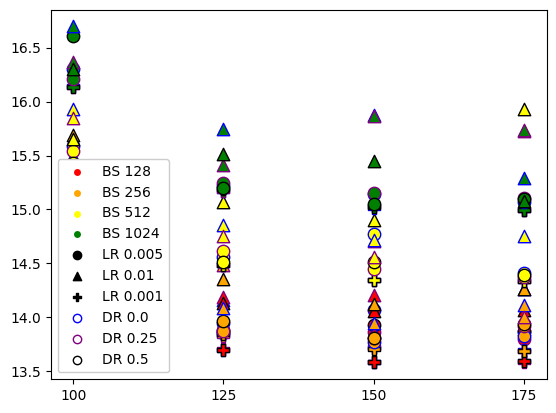

In [104]:
from eta00.threshold04history_all import data
import numpy as np
import math

df = pd.DataFrame(data)
df128 = df[df['bs'] == 128]
f = plt.figure()

bss = list(set(df.bs))
lrs = list(set(df.lr))
drs = list(set(df.dr))
markers = ['o', '^', 'P']
colors = ["red", "orange", "yellow", "green"]
edgecolors = ["blue", "purple", "black", "grey"]

for _, row in df.iterrows():
    plt.scatter(row.pl//1000, math.log(row.total_cost), c=colors[bss.index(row.bs)], marker=markers[lrs.index(row.lr)], edgecolors=edgecolors[drs.index(row.dr)], s=80)

f = lambda m,c,e: plt.scatter([],[],marker=m, color=c, edgecolors=e)

plt.xticks(range(100, 176, 25), ["100", "125", "150", "175"])
# plt.ylim(13.5, 13.7)
handles = [f("o", colors[i], "white") for i in range(len(colors))]
handles += [f(markers[i], "black", "black") for i in range(len(markers))]
handles += [f("o", "white", edgecolors[i]) for i in range(len(edgecolors))]

plt.legend(handles, [f"BS {bs}" for bs in bss] + [f"LR {lr}" for lr in lrs] + [f"DR {dr}" for dr in drs], loc=3, framealpha=1)
# for _, row in df128.iterrows():
#     labels.append(f"pl{row.pl//1000}+lr{row.lr}+dr{row.dr}")
# ax.set_xticks(range(36), labels=labels, rotation="vertical")

AttributeError: 'PathCollection' object has no attribute '_legmarker'

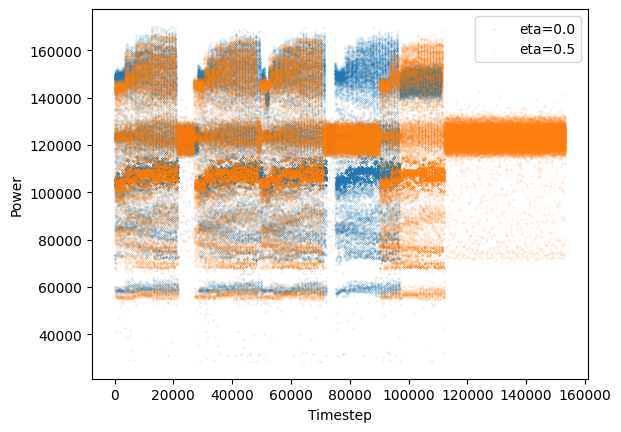

In [132]:
import pandas as pd
df = pd.read_csv('eta00/zeus_logs+gpu0.power.csv')
df2 = pd.read_csv('eta05/zeus_logs+gpu0.power.csv')

plt.scatter(range(len(df.Power)), df.Power, s=0.01, alpha=0.8, label="eta=0.0")
plt.scatter(range(len(df2.Power)), df2.Power, s=0.01, alpha=0.8, label="eta=0.5")
plt.axhline(y = 175000, color = 'black', linestyle = '-')
plt.xlabel("Timestep")
plt.ylabel("Power")
# legend = plt.legend(numpoints=1, fontsize=10)
# legend.legendHandles[0]._legmarker.set_markersize(6)
# legend.legendHandles[1]._legmarker.set_markersize(6)
plt.show()